# ADOBE vs VGT - Vanguard Tech ETF
### Entry Threshold:	2.00 | Exit Threshold:	0.30 | Max Duration:	20 | 
### MA Period:	30	MA Type:	EMA	| StdDev Period:	15 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2018, 1, 1)  # The start of the year for example
end= datetime.datetime(2019, 9, 30)

In [3]:
ticker_1 = "adbe"
ticker_2 = "vgt"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,280.279999,276.320007,278.220001,278.350006,2948600,278.350006
2019-09-16,283.049988,275.299988,276.619995,282.929993,2774700,282.929993
2019-09-17,285.299988,280.359985,284.040009,284.690002,4069200,284.690002
2019-09-18,280.290009,270.019989,275.350006,279.720001,7449700,279.720001
2019-09-19,284.369995,279.829987,280.170013,281.260010,3163500,281.260010


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-13,219.000000,217.369995,218.880005,217.539993,284900.0,217.539993
2019-09-16,217.770004,215.460007,215.869995,217.330002,291000.0,217.330002
2019-09-17,218.250000,217.009995,217.429993,218.110001,196400.0,218.110001
2019-09-18,218.289993,215.250000,217.929993,218.229996,277800.0,218.229996
2019-09-19,220.559998,218.369995,218.839996,218.720001,467400.0,218.720001


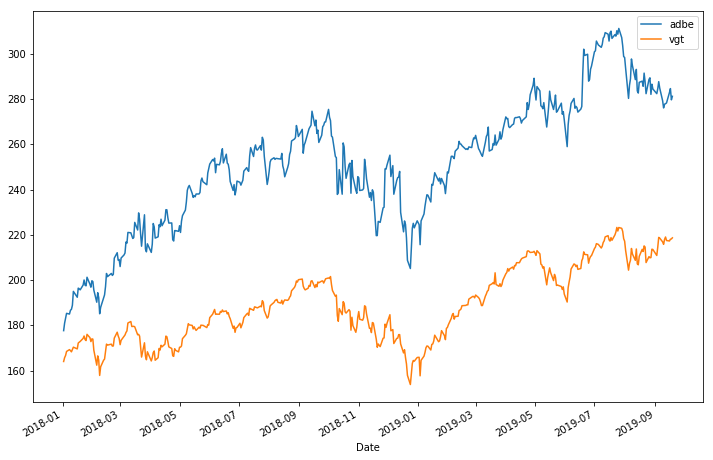

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

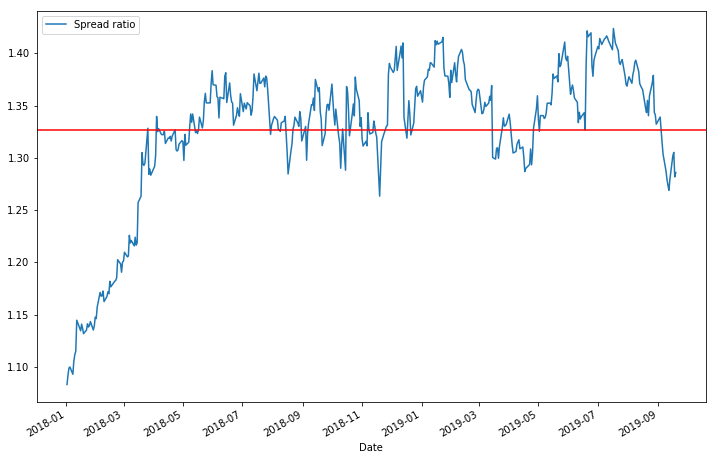

In [9]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [10]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

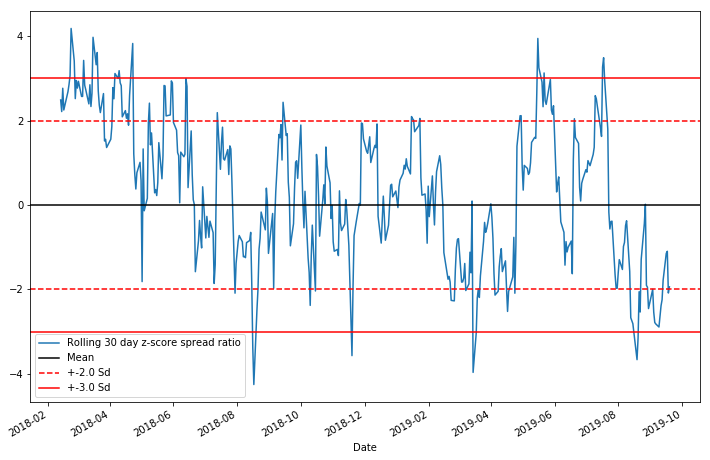

In [11]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(15).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+-2.0 Sd', '+-3.0 Sd']);

In [12]:
from statsmodels.tsa.stattools import coint

In [13]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [14]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [15]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair adbe VS vgt: -2.9860121626311464
Alpha value for the T-stat:  0.11356794279346838
--------------------------------------
T-stat 99%:  -3.922030925436448
T-stat 95%:  -3.3503432961170536
T-stat 90%:  -3.0543050137003998


In [16]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.92323883],
       [0.92323883, 1.        ]])

In [17]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[851.11145757, 440.73708004],
       [440.73708004, 267.75933495]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [18]:
zscore_30_1_ratio

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18         NaN
2018-01-19         NaN
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-29         NaN
2018-01-30         NaN
2018-01-31         NaN
2018-02-01         NaN
2018-02-02         NaN
2018-02-05         NaN
2018-02-06         NaN
2018-02-07         NaN
2018-02-08         NaN
2018-02-09         NaN
2018-02-12         NaN
2018-02-13    2.489393
                ...   
2019-08-08   -0.490393
2019-08-09   -0.374489
2019-08-12   -1.574342
2019-08-13   -2.673215
2019-08-14   -2.741726
2019-08-15   -2.812921
2019-08-16   -3.025291
2019-08-19   -3.666942
2019-08-20   -3.155296
2019-08-21   -2.056745
2019-08-22   -2.537630
2019-08-23   -1.288452
2019-0

In [25]:
statsmodels.tsa.stattools.adfuller(spread_ratio, maxlag=None, regression='c', autolag='t-stat', store=False, regresults=False)

(-3.491787354902937,
 0.008200534300570357,
 1,
 430,
 {'1%': -3.4456494576955485,
  '5%': -2.8682850303746843,
  '10%': -2.570362866414278},
 2.4691724391288523)

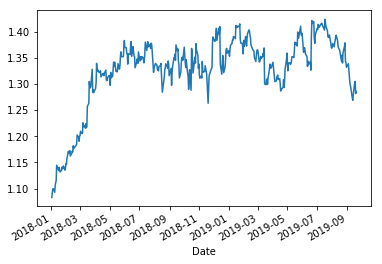

In [20]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)
spread_ratio.plot()

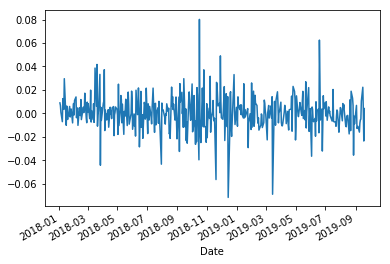

In [21]:
#plot the differenced spread
t_series_lag_1.plot()

In [22]:
#statsmodels.tsa.stattools.adfuller()

In [23]:
spreadratio_ewmamavg30 = spread_ratio.ewm(30).mean()

##  vgt top holdings : ADBE; intel; cisco; apple; - co-integrated